<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Rizdha !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Rizdha ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Rizdha dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Project Description

Perusahaan asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan *machine learning*. Kita pun diminta untuk mengevaluasi kemungkinan tersebut.

- Tugas 1: Temukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Prediksi apakah klien baru kemungkinan akan mengambil klaim asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Prediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Tugas 4: Lindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. Sangatlah penting untuk mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun. Di sini, Anda tidak perlu memilih model yang terbaik, cukup buktikan bahwa algoritme Anda bekerja secara akurat.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Pra-pemrosesan & Eksplorasi Data

## Inisialisasi

In [1]:
# For numerical operations
import numpy as np
import math

# For dataframe manipulation
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
import sklearn.linear_model
import sklearn.metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split


from IPython.display import display

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Muat Data

Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [2]:
try:
    df = pd.read_csv('insurance_us.csv')
except:
    df = pd.read_csv('/datasets/insurance_us.csv')

mengganti nama kolom untuk membuat kode terlihat lebih konsisten dengan gayanya.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2272,0,30.0,42800.0,0,0
2024,1,29.0,52500.0,0,0
1629,1,27.0,46600.0,2,0
3669,1,22.0,41400.0,1,0
3354,1,30.0,33200.0,3,0
4308,1,45.0,48900.0,2,1
1004,1,29.0,42400.0,0,0
65,1,18.0,35400.0,2,0
1892,0,29.0,37000.0,1,0
4723,0,31.0,53300.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# Change 'age' from float data type to int
df.age = df.age.astype('int')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [8]:
# Mengamati statistika deskriptif dari data kita
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [9]:
# Check duplicate
df.duplicated().sum()

153

In [10]:
# Drop duplicates
df.drop_duplicates(ignore_index=True, inplace=True)
print('Size after duplicate deletion:', df.shape)
print('Duplicates:', df.duplicated().sum())

Size after duplicate deletion: (4847, 5)
Duplicates: 0


- Pada kolom age type data yang awalnya float diubah menjadi integer
- Tidak ditemukan adanya data yang hilang
- Mendrop 153 data duplikat

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## EDA

Mari kita periksa dengan cepat, apakah ada kelompok pelanggan tertentu dengan melihat plot pasangan?

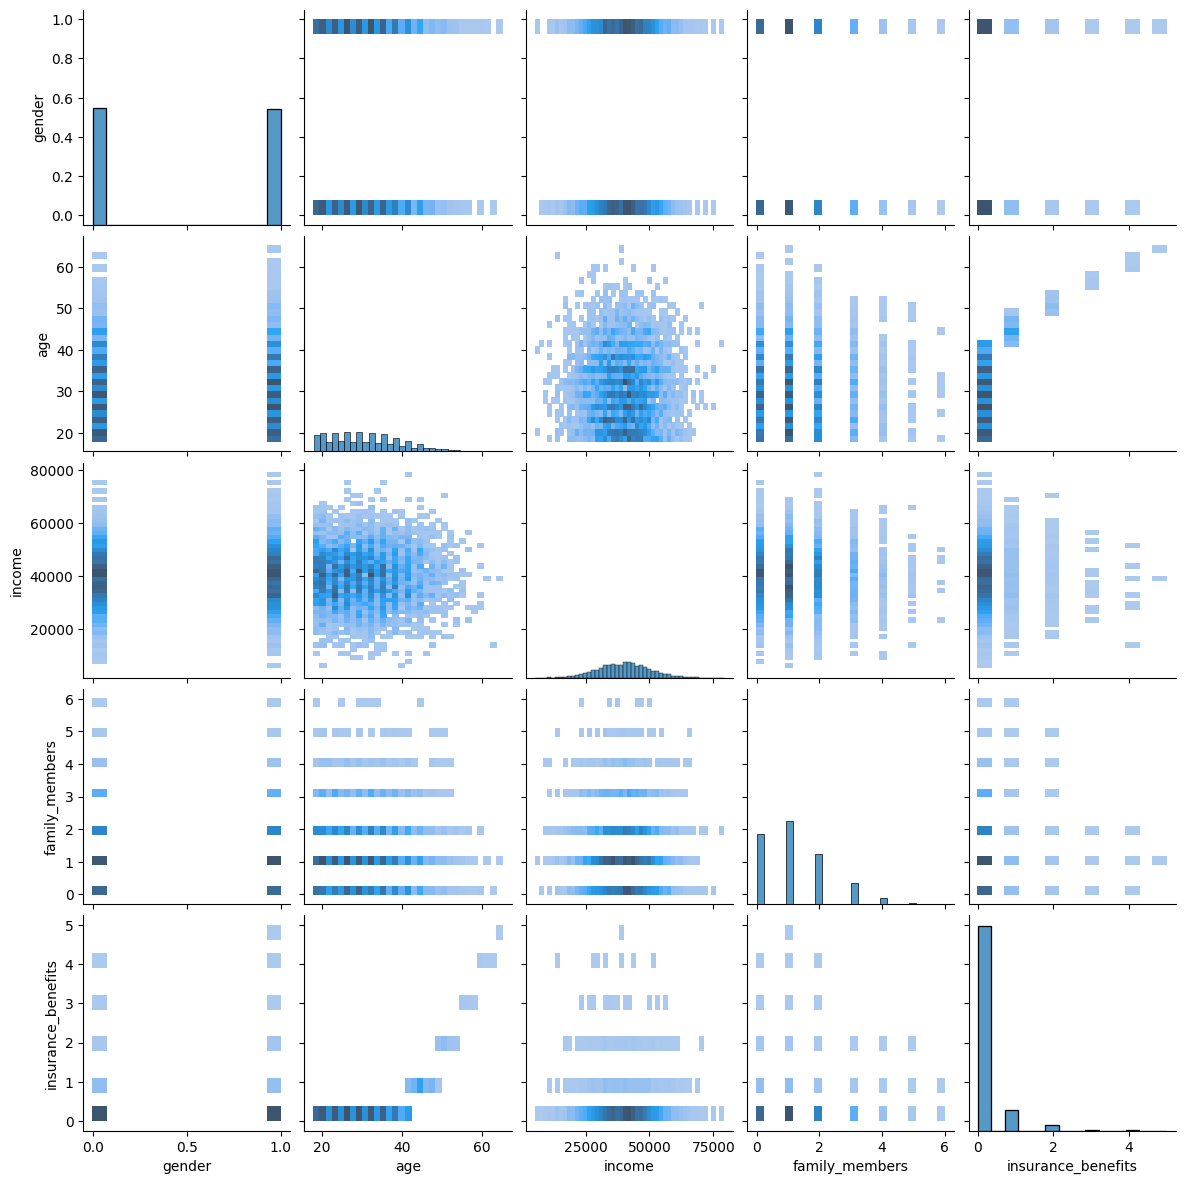

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Baiklah, sepertinya agak sulit untuk melihat kelompok (klaster) yang jelas mengingat sulitnya menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). Namun, itulah gunanya LA dan ML di sini.

Kita akan melihat korelasi antar kolom

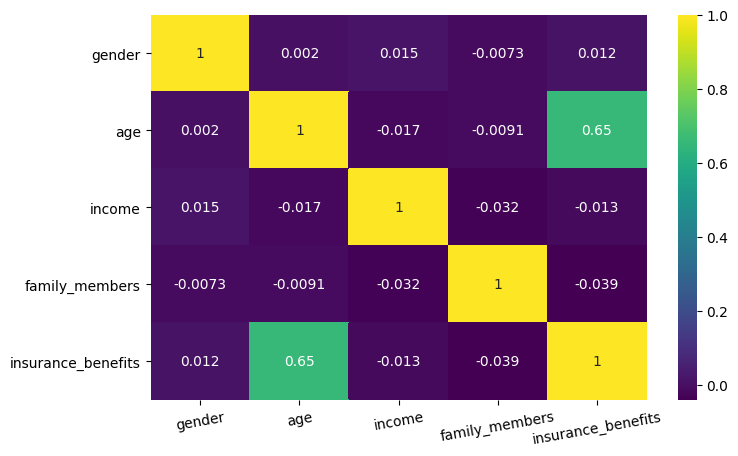

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(rotation=10)
plt.show()

Dari sini bisa kita lihat target insurance_benefit memiliki korelasi yang kuat dengan age sedangkan untuk korelasi antar fitur tidak ada sehingga aman dari kolinearitas

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tugas 1. Klien yang Mirip

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek.

Anda mungkin ingin mengulas kembali pelajaran berikut (bab -> pelajaran)
- Jarak Antar Vektor -> Jarak Euklides
- Jarak Antar Vektor -> Jarak Manhattan

Untuk menyelesaikan tugas ini, kita bisa mencoba beberapa metrik jarak.

Buatlah sebuah fungsi yang menampilkan *k-nearest neighbors* terdekat untuk objek ke-n berdasarkan metrik jarak tertentu.  Besarnya klaim asuransi yang diterima tidak perlu diperhitungkan dalam tugas ini.

Anda bisa menggunakan implementasi algoritme kNN yang sudah tersedia di Scikit-learn  (periksa [tautan](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ini) atau menggunakan punya Anda sendiri.

Uji algoritme tersebut untuk empat kombinasi dari dua kasus
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euklides
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
def get_knn(df, n, k, metric):
    
    """
    Menampilkan k nearest neighbors

    :param df: DataFrame Pandas digunakan untuk menemukan objek-objek yang mirip di dalamnya
    :param n: nomor objek yang dicari k nearest neighbors
    :param k: jumlah k nearest neighbors yang ditampilkan
    :param metric: nama metrik jarak
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Mengatur skala data.

In [15]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [16]:
df_scaled.head()

,gender,age,income,family_members,insurance_benefits
0,1.0,0.630769,0.627848,0.166667,0
1,0.0,0.707692,0.481013,0.166667,1
2,0.0,0.446154,0.265823,0.000000,0
3,0.0,0.323077,0.527848,0.333333,0
4,1.0,0.430769,0.330380,0.000000,0


Sekarang, mari kita dapatkan catatan yang mirip untuk setiap kombinasi yang ada

Model tanpa skala

In [17]:
get_knn(df, n=1, k=5, metric='euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000.0,1,1,0.000000
3810,0,40,38000.0,0,0,6.082763
4796,1,37,38000.0,1,0,9.055385
2480,1,36,38000.0,0,0,10.099505
3498,0,33,38000.0,0,0,13.038405


In [18]:
get_knn(df, n=1, k=5, metric='manhattan')

,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000.0,1,1,0.0
3810,0,40,38000.0,0,0,7.0
4796,1,37,38000.0,1,0,10.0
2480,1,36,38000.0,0,0,12.0
3498,0,33,38000.0,0,0,14.0


Model dengan skala

In [19]:
get_knn(df_scaled, n=1, k=5, metric='euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1,0.0,0.707692,0.481013,0.166667,1,0.000000
4041,0.0,0.707692,0.477215,0.166667,1,0.003797
1835,0.0,0.707692,0.492405,0.166667,1,0.011392
4833,0.0,0.723077,0.491139,0.166667,1,0.018418
4341,0.0,0.692308,0.459494,0.166667,1,0.026453


In [20]:
get_knn(df_scaled, n=1, k=5, metric='manhattan')

,gender,age,income,family_members,insurance_benefits,distance
1,0.0,0.707692,0.481013,0.166667,1,0.000000
4041,0.0,0.707692,0.477215,0.166667,1,0.003797
1835,0.0,0.707692,0.492405,0.166667,1,0.011392
4833,0.0,0.723077,0.491139,0.166667,1,0.025511
2394,0.0,0.676923,0.482278,0.166667,1,0.032035


Jawab pertanyaannya

**Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?** 

Tentu data yang tidak berskala memengaruhi algoritme kNN, data yang tidak berskala memiliki distance yang nilainya jauh lebih besar dibandingkan data yang berskala.

**Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?** 

Metrik Euclidian dan metrik Manhattan mempunyai hasil yang serupa, meskipun tidak persis sama. Namun metrik Euclidian cenderung memiliki jarak yang lebih kecil dibandingkan metrik Manhattan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tugas 2. Apakah klien kemungkinan menerima klaim asuransi?

Dalam konteks *machine learning*, tugas ini sama seperti tugas klasifikasi biner.

Dengan target insurance_benefits yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 bagi data asli dan data yang diskalakan. Akan menarik untuk melihat bagaimana k dapat memengaruhi metrik evaluasi, dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritme klasifikasi kNN yang tersedia di Scikit-learn (periksa [tautan ini](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau gunakan milik Anda sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Mari kita uji model dengan empat nilai probabilitas: 0, probabilitas membayar benefit asuransi apa pun; 0,5; 1.

Probabilitas membayar klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi *training* dan *test set*.

In [21]:
# Hitung tagetnya
df['insurance_benefits_received'] = df['insurance_benefits'].apply(lambda x: 1 if x > 0 else 0)
df.sample(5)

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
3251,1,36,47600.0,0,0,0
3161,0,30,45500.0,2,0,0
928,1,28,45300.0,0,0,0
4382,0,28,48400.0,1,0,0
4525,0,27,42500.0,2,0,0


In [22]:
# memeriksa ketidakseimbangan kelas penerima asuransi dan bukan penerima asuransi dengan value_counts()
df.insurance_benefits_received.value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

In [23]:
# fungsi untuk menghitung F1 skor dan confusion matrix
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# jika Anda memiliki masalah dengan baris berikut, muat ulang kernel dan jalankan notebook kembali
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriks Kesalahan')
    print(cm)

In [24]:
# menghasilkan output dari model acak
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [25]:
# membuat model acak
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probabilitasnya: 0.00
F1: 0.00
Matriks Kesalahan
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

Probabilitasnya: 0.12
F1: 0.13
Matriks Kesalahan
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

Probabilitasnya: 0.50
F1: 0.19
Matriks Kesalahan
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

Probabilitasnya: 1.00
F1: 0.21
Matriks Kesalahan
[[0.         0.88384568]
 [0.         0.11615432]]



Create Models with Actual Data and Scaled Data

In [26]:
# split features and target
features = ['age', 'gender', 'income', 'family_members']
target = ['insurance_benefits_received']

In [27]:
# model results with actual data
X = df[features].to_numpy()
y = df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_test_pred = knn.predict(X_test)
    
    print(f'n_neighbors = {n}')
    eval_classifier(y_test, y_test_pred) 
        
    print()

n_neighbors = 1
F1: 0.66
Matriks Kesalahan
[[0.86735395 0.02405498]
 [0.04261168 0.06597938]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 2
F1: 0.47
Matriks Kesalahan
[[0.88522337 0.00618557]
 [0.07353952 0.03505155]]

n_neighbors = 3
F1: 0.45
Matriks Kesalahan
[[0.87285223 0.0185567 ]
 [0.07147766 0.0371134 ]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 4
F1: 0.16
Matriks Kesalahan
[[0.88934708 0.00206186]
 [0.09896907 0.00962199]]

n_neighbors = 5
F1: 0.17
Matriks Kesalahan
[[0.88659794 0.004811  ]
 [0.09828179 0.01030928]]

n_neighbors = 6
F1: 0.08
Matriks Kesalahan
[[8.90721649e-01 6.87285223e-04]
 [1.03780069e-01 4.81099656e-03]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 7
F1: 0.11
Matriks Kesalahan
[[8.90721649e-01 6.87285223e-04]
 [1.02405498e-01 6.18556701e-03]]

n_neighbors = 8
F1: 0.02
Matriks Kesalahan
[[0.89140893 0.        ]
 [0.10721649 0.00137457]]

n_neighbors = 9
F1: 0.04
Matriks Kesalahan
[[0.89140893 0.        ]
 [0.10652921 0.00206186]]

n_neighbors = 10
F1: 0.02
Matriks Kesalahan
[[0.89140893 0.        ]
 [0.10721649 0.00137457]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
# model results with scaled data
X = df_scaled[features].to_numpy()
y = df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_test_pred = knn.predict(X_test)
    
    print(f'n_neighbors = {n}')
    eval_classifier(y_test, y_test_pred) 
        
    print()

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 1
F1: 0.95
Matriks Kesalahan
[[0.88522337 0.00618557]
 [0.00549828 0.10309278]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 2
F1: 0.95
Matriks Kesalahan
[[0.89003436 0.00137457]
 [0.00962199 0.09896907]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 3
F1: 0.95
Matriks Kesalahan
[[0.88728522 0.00412371]
 [0.00687285 0.10171821]]

n_neighbors = 4
F1: 0.94
Matriks Kesalahan
[[0.89003436 0.00137457]
 [0.01099656 0.0975945 ]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 5
F1: 0.94
Matriks Kesalahan
[[0.88797251 0.00343643]
 [0.00824742 0.10034364]]

n_neighbors = 6
F1: 0.93
Matriks Kesalahan
[[0.88934708 0.00206186]
 [0.01168385 0.09690722]]

n_neighbors = 7
F1: 0.96
Matriks Kesalahan
[[0.88865979 0.00274914]
 [0.00549828 0.10309278]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 8
F1: 0.94
Matriks Kesalahan
[[0.89003436 0.00137457]
 [0.01099656 0.0975945 ]]

n_neighbors = 9
F1: 0.94
Matriks Kesalahan
[[0.88865979 0.00274914]
 [0.00893471 0.09965636]]

n_neighbors = 10
F1: 0.95
Matriks Kesalahan
[[8.90721649e-01 6.87285223e-04]
 [1.03092784e-02 9.82817869e-02]]



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


- Dataset scaling memberikan hasil F1 Score yang lebih baik dibandingkan dengan dataset actual
- Dataset scaling memiliki performa yang lebih baik untuk memprediksi target kostumer yang tidak menerima insurance benefits
- Semakin banyak jumlah k-neighbors nilai F1 Score pada dataset actual cenderung semakin rendah, sedangkan pada dataset scaling hanya mengalami sedikit perbedaan terhadap jumlah k-neighbors.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tugas 3. Regresi (dengan Regresi Linear)

Dengan `insurance_benefit` sebagai target, evaluasi berapa RMSE untuk model Regresi Linear.

Buat implementasi LR Anda sendiri. Untuk itu, coba ingat-ingat kembali bagaimana solusi tugas regresi linear dirumuskan dalam bentuk LA. Periksa RMSE untuk data asli maupun data yang telah diskalakan. Bisakah Anda melihat perbedaan RMSE di antara kedua kasus ini?

Tunjukkan
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari satuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Sepertinya ada solusi analitis untuk masalah di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi

$$
\hat{y} = X_{val}w
$$

Pisahkan keseluruhan data menjadi *training set* dan *validation set* dengan proporsi 70:30. Gunakan metrik RMSE untuk evaluasi model.

In [29]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)# < ketik kode program Anda di sini >

    def predict(self, X):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)# < ketik kode program Anda di sini >
        y_pred = X2.dot(self.weights)# < ketik kode program Anda di sini >
        
        return y_pred

In [30]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

rmse and r2 score results with actual data

In [31]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


rmse and r2 score results with scaling data

In [32]:
X = df_scaled[features].to_numpy()
y = df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[[-0.6698156 ]
 [ 1.62473815]
 [ 0.00440576]
 [ 0.03780298]
 [-0.05229838]]
RMSE: 0.24
R2: 0.67


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tugas 4. Pengaburan Data

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

Coba lakukan itu dan periksa bagaimana nilai fitur akan terlihat setelah transformasi. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan $P$ bahwa $P$ bersifat *invertible*.

Anda mungkin ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [33]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [34]:
X = df_pn.to_numpy()
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Membuat matriks acak $P$.

In [35]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Memeriksa apakah matriks $P$ *invertible*

In [36]:
P_inv = np.linalg.inv(P)
P_inv

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Bisakah Anda menebak usia klien atau pendapatannya setelah dilakukan transformasi?

In [37]:
X1 = X @ P

pd.DataFrame(X1)

,0,1,2,3
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378
...,...,...,...,...
4842,4577.581382,16107.740932,13259.688205,33107.974380
4843,6717.000247,23634.217067,19456.138634,48589.438841
4844,4346.223425,15289.241265,12586.162644,31433.508886
4845,4194.093242,14751.991024,12144.029306,30323.887634


Bisakah Anda memulihkan data asli dari $X'$ jika $P$ sudah diketahui? Coba periksa hal tersebut melalui perhitungan dengan memindahkan $P$ dari sisi kanan rumus di atas ke sisi kiri. Aturan perkalian matriks sangat berguna di sini.

In [38]:
X_rec = X1 @ P_inv

# display sample
pd.DataFrame(X_rec)

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13
...,...,...,...,...
4842,-2.559766e-12,28.0,35700.0,2.000000e+00
4843,-5.486091e-12,34.0,52400.0,1.000000e+00
4844,-1.928379e-12,20.0,33900.0,2.000000e+00
4845,1.000000e+00,22.0,32700.0,3.000000e+00


Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [39]:
# comparing dataframes
df_trans = pd.DataFrame(X1, columns=df_pn.columns)
df_recover = pd.DataFrame(X_rec, columns=df_pn.columns)
df_diff = pd.concat([df_pn, df_trans, df_recover], axis=1, keys=['actual', 'transformed', 'recovered'])

In [40]:
df_diff.head()

actual                              transformed                              \
  gender age   income family_members       gender           age        income   
0      1  41  49600.0              1  6359.715273  22380.404676  18424.090742   
1      0  46  38000.0              1  4873.294065  17160.367030  14125.780761   
2      0  29  21000.0              0  2693.117429   9486.397744   7808.831560   
3      0  21  41700.0              2  5345.603937  18803.227203  15479.148373   
4      1  28  26100.0              0  3347.176735  11782.829283   9699.998942   

                     recovered                                
  family_members        gender   age   income family_members  
0   46000.696690  1.000000e+00  41.0  49600.0   1.000000e+00  
1   35253.455773 -4.473636e-12  46.0  38000.0   1.000000e+00  
2   19484.860631 -2.515869e-12  29.0  21000.0   9.524523e-13  
3   38663.061863 -4.844982e-12  21.0  41700.0   2.000000e+00  
4   24211.273378  1.000000e+00  28.0  26100.0  -1.019907e-13

Mungkin kita bisa melihat bahwa terdapat beberapa nilai yang tidak benar-benar sama dengan data sebelum ditransformasi. Kenapa bisa begitu?
Hal itu dikarenakan  type data floats pada matriks yang mana menghasilkan bilangan pecahan yang sangat kecil
contoh = 10:3 = 3.33, tetapi 3x3.33 = 9.99
Namun hal ini dapat diatasi menggunakan pembulatan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

##  Buktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linear. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah Anda yakin Anda bisa melakukannya?? Anda tidak harus yakin sekarang, tetapi Anda harus membuktikannya!

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika Anda menyederhanakan rumus untuk wP di atas?

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya bagi kualitas regresi linier jika Anda mengukurnya dengan RMSE?

Periksa lampiran B (Sifat-sifat Matriks) di bagian *notebook*. Tersedia beberapa rumus yang berguna di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

**Jawaban**

Kualitas Regresi Linier yang diukur dengan RMSE atau R2 tidak berubah karena kita melakukan transformasi.

**Bukti analitis**

$$
\begin{align}
w_P &= [(XP)^T XP]^{-1} (XP)^T y \\
    &= [P^T X^T X P]^{-1} (XP)^T y \\
    &= [(P^T X^T X) P]^{-1} (XP)^T y \\
    &= P^{-1} [P^T X^T X]^{-1} (XP)^T y \\
    &= P^{-1} [X^T X]^{-1} [P^T]^{-1} (XP)^T y \\
    &= P^{-1} [X^T X]^{-1} [P^T]^{-1} P^T X^T y \\
    &= P^{-1} [X^T X]^{-1} I X^T y \\
    &= P^{-1} [X^T X]^{-1} X^T y \\    
    &= P^{-1} \boxed{[X^T X]^{-1} X^T y}
\end{align}
$$

$$w_P = P^{-1} [X^T X]^{-1} X^T y $$

$$
\begin{align}
w_P &= P^{-1} w \\
P w_P &= P P^{-1} w \\
P w_P &= w \\
w &= P w_P \\
\end{align}
$$

Jika $w_P$ dimasukan kedalam RMSE akan menjadi:
$$
\begin{aligned}
w_p &= \frac{y}{X_{(p)}} \\[4ex]
\hat{y} &= X_{val(p)}w_p\\[2ex]
RMSE &= \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}\\[5ex]
RMSE &= \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_{i(w_P)} - \hat{y}_{i(w_P)})^2}
\end{aligned}
$$
RMSE tidak akan berpengaruh karena hanya menghitung selisih hasil 'true' $y_i$ dan hasil 'predict' $\hat{y}_i$ berdasarkan data yang sudah ditransformasikan $P$.

## Uji Regresi Linear dengan Pengaburan Data

Sekarang, mari kita buktikan kalau Regresi Linear dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih.

Buat prosedur atau kelas yang menjalankan regresi linear dengan pengaburan data. Anda bisa menggunakan regresi linear yang tersedia di scikit-learn atau milik Anda sendiri.

Jalankan regresi linear terhadap data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, serta nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- <! ketik komentar Anda di sini !>
- Gunakan $XP$ sebagai matriks fitur baru 

Membuat matriks $P dari angka acak

In [42]:
P1 = np.random.randint(1,20,(X.shape[1], X.shape[1]))
P1

array([[ 1, 17,  2, 10],
       [18,  6,  4,  2],
       [ 6, 14,  5, 14],
       [ 4,  6, 19, 10]])

Memeriksa apakah matriks $P1 invertible atau tidak

In [44]:
inv_P1 = np.linalg.inv(P1)
I = np.around(P1.dot(inv_P1))
I

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1., -0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])

Matriks acak $P1 merupakan matriks invertible.

In [45]:
inv_P1

array([[-0.03746604,  0.05090805,  0.02995853, -0.01465751],
       [ 0.13284713,  0.02559703, -0.1043186 ,  0.00807951],
       [ 0.03374803,  0.00757901, -0.07278707,  0.06663807],
       [-0.12884313, -0.05012155,  0.18890319, -0.02559703]])

Menghitung skor RMSE dan R2 menggunakan fitur original

In [46]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


Menghitung skor RMSE dan R2 menggunakan fitur transformasi 

In [47]:
X_transformasi = X.dot(P1)
X_transformasi

array([[297663., 695109., 248105., 694822.],
       [228050., 532788., 190111., 532470.],
       [126029., 294493., 105058., 294290.],
       ...,
       [203428., 474952., 169578., 474820.],
       [196252., 458198., 163605., 458052.],
       [243650., 568888., 203079., 568692.]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_transformasi, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366679e-01 -1.67425437e-04  5.15883214e-03  5.46080156e-04
 -5.28206520e-03]
RMSE: 0.36
R2: 0.66


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Kesimpulan

Kita telah mengevaluasi permintaan dari perusahaan 'Sure Tomorrow' dengan menggunakan machine learning

- Mengganti tipe data pada kolom age dari 'float' menjadi 'int'
- Mendrop 153 data duplikat
- Dataset scaling memberikan hasil F1 Score yang lebih baik dibandingkan dengan dataset actual
- Skor RMSE dan R2 tidak berpengaruh terhadap model regresi linier untuk dataset original maupun scaling. Untuk nilai predictors/weight menunjukan perbedaan jika menggunakan dataset original atau dataset scaling.
- Dari hasil menunjukan bahwa kita bisa melakukan transformasi fitur menggunakan matriks P dan mengembalikanya kesemula dari hasil transformasi dengan syarat matriks P invertible.
- Proses transformasi pada fitur menggunakan matriks acak P yang invertible, tidak ada perbedaan skor RMSE dan R2 baik untuk fitur asli maupun fitur transformasi.

# Daftar Periksa

Ketik 'x' untuk memeriksa. Lalu tekan Shitf+Enter

- [x]  Jupyter Notebook dibuka
- [x]  Tidak ada kesalahan kode
- [x]  Sel disusun sesuai urutan yang logis dan eksekusi
- [x]  Tugas 1 telah dikerjakan
    - [x]  Ada prosedur yang bisa menampilkan k klien yang mirip dengan klien tertentu
    - [x]  Prosedur diuji untuk keempat kombinasi yang diusulkan
    - [x]  Pertanyaan terkait skala/jarak sudah terjawab
- [x]  Tugas 2 telah dikerjakan
    - [x]  Telah dibuat model klasifikasi acak untuk semua level probabilitas
    - [x]  Model klasifikasi kNN telah dibuat dan diuji, baik untuk data asli maupun untuk data yang telah diberi skala. Metrik F1 telah diperhitungkan.
- [x]  Tugas 3 telah dikerjakan
    - [x]  Solusi regresi linear diimplementasikan menggunakan pengoperasian matriks.
    - [x]  RMSE telah dihitung untuk solusi yang diimplementasikan.
- [x]  Tugas 4 telah dikerjakan
    - [x]  Data dikaburkan dengan matriks P acak dan *invertible*
    - [x]  Data yang dikaburkan telah dipulihkan, ada beberapa contoh yang ditampilkan
    - [x]  Terdapat bukti analitis bahwa transformasi tidak mempengaruhi RMSE
    - [x]  Terdapat bukti perhitungan bahwa transformasi tidak memengaruhi RMSE
- [x]  Ada kesimpulan

# Apendiks 

## Apendiks A: Menulis Rumus di Jupyter Notebooks

Anda dapat menulis rumus di Jupyter Notebook dalam bahasa *markup* yang disediakan oleh sistem penerbitan berkualitas tinggi bernama $\LaTeX$ (diucapkan "Lah-tech"), dan rumus tersebut akan terlihat seperti rumus yang ada di buku teks.

Untuk memasukkan rumus ke dalam teks, letakkan tanda dolar (\\$) sebelum dan sesudah teks rumus. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Jika rumus harus ditulis dalam satu paragraf tersendiri, letakkan dua tanda dolar (\\$\\$) sebelum dan sesudah teks.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

Bahasa markup [LaTeX](https://en.wikipedia.org/wiki/LaTeX) sangat populer di kalangan orang-orang yang menggunakan rumus dalam artikel, buku, dan teks. Bahasa tesebut memang tampak rumit, tetapi dasarnya sebenarnya mudah. Periksa dua halaman [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) berikut untuk mempelajari cara membuat rumus yang paling umum.

## Apendiks B: Properti Matriks

Matriks memiliki banyak properti di Aljabar Linear. Beberapa di antaranya ada di daftar berikut yang dapat membantu pembuktian analitis dalam proyek ini.

<table>
<tr>
<td>Pendistribusian</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-komutativitas</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Properti asosiatif dari perkalian</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Properti identitas perkalian</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilitas dari transposisi hasil kali matriks,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>